In [6]:
from core.read_events import *
from core.utils import *
from Gaugi import stdvector2list, progressbar, GeV
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from ROOT import kBird,kBlackBody,gStyle
from pprint import pprint

import os
import json
import pandas as pd
import array
import numpy as np
import pickle
import rootplotlib as rpl
import matplotlib.pyplot as plt
rpl.set_lorenzetti_style()
rpl.suppress_root_warnings()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

os.makedirs('output', exist_ok=True)


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read ATLAS Cells:

In [7]:
lztpath = os.environ['LZT_PATH']
basepath = '/home/jodafons/public/cern_data/simulation/v1.0.1'
atlas_cells = json.load(open(lztpath+'/geometry/DetectorATLASModel/data/atlas_granularity.json'))
atlas_cells.keys()

dict_keys(['PSB', 'PSE', 'EMB1', 'EMB2', 'EMB3', 'TileCal1', 'TileCal2', 'TileCal3', 'TileExt1', 'TileExt2', 'TileExt3', 'EMEC1', 'EMEC2', 'EMEC3', 'HEC1', 'HEC2', 'HEC3'])

## Cells:

In [11]:
def get_cells (path, evt, sampling, eta_window=0.4, hi_window=0.4 , eta=0, phi=0):
    event = EventStore(path, "physics")
    event.GetEntry(evt)
    #cluster = event.retrieve("CaloClusterContainer_Clusters").at(0)
    cells = event.retrieve("CaloCellContainer_Cells")
    descriptors = event.retrieve("CaloDetDescriptorContainer_Cells" )
    
    def get_bins_inside_window( bins, center, window=0.4):
        bins = np.array(bins)
        return [ bins[idx] for idx in np.where((bins >= center-window/2) & (bins <=center+window/2))[0] ]
    
    
    collections=[]
    
    class Cell:
        def __init__( self, e, et, eta, phi, sampling ):
            self.e = float(e); self.et = float(et); 
            self.eta = float(eta); self.phi = float(phi); self.sampling = int(sampling)
    for cell in cells:
        det = descriptors.at( cell.descriptor_link )
        #if det.sampling in sampling:
        collections.append(Cell(det.etruth, cell.et, cell.eta, cell.phi, det.sampling))
              
                
    eta_bins = get_bins_inside_window( atlas_cells[sampling][0]['EtaBins'], eta )
    phi_bins = get_bins_inside_window( atlas_cells[sampling][0]['PhiBins'], phi )
    h2 = rpl.hist2d.new2( 'hist', eta_bins, phi_bins )
    for cell in collections:
        binx = h2.GetXaxis().FindBin(cell.eta)
        biny = h2.GetYaxis().FindBin(cell.phi)    
        h2.SetBinContent( binx, biny, cell.e )
    
    
    image = np.zeros((len(phi_bins)-1, len(eta_bins)-1))
    
    for eta_b in range(len(eta_bins)-1):
        for phi_b in range(len(phi_bins)-1):
            image[phi_b][eta_b] = h2.GetBinContent(eta_b+1, phi_b+1)
    
    return image, eta_bins, phi_bins
    




In [66]:
path = '~/electrons.ESD.root.0'
sampling = 'EMB2'
evt = 0
im,  _, _ = get_cells(path, evt, 'EMB1', eta=0, phi=1.52)
im[im<0]=0

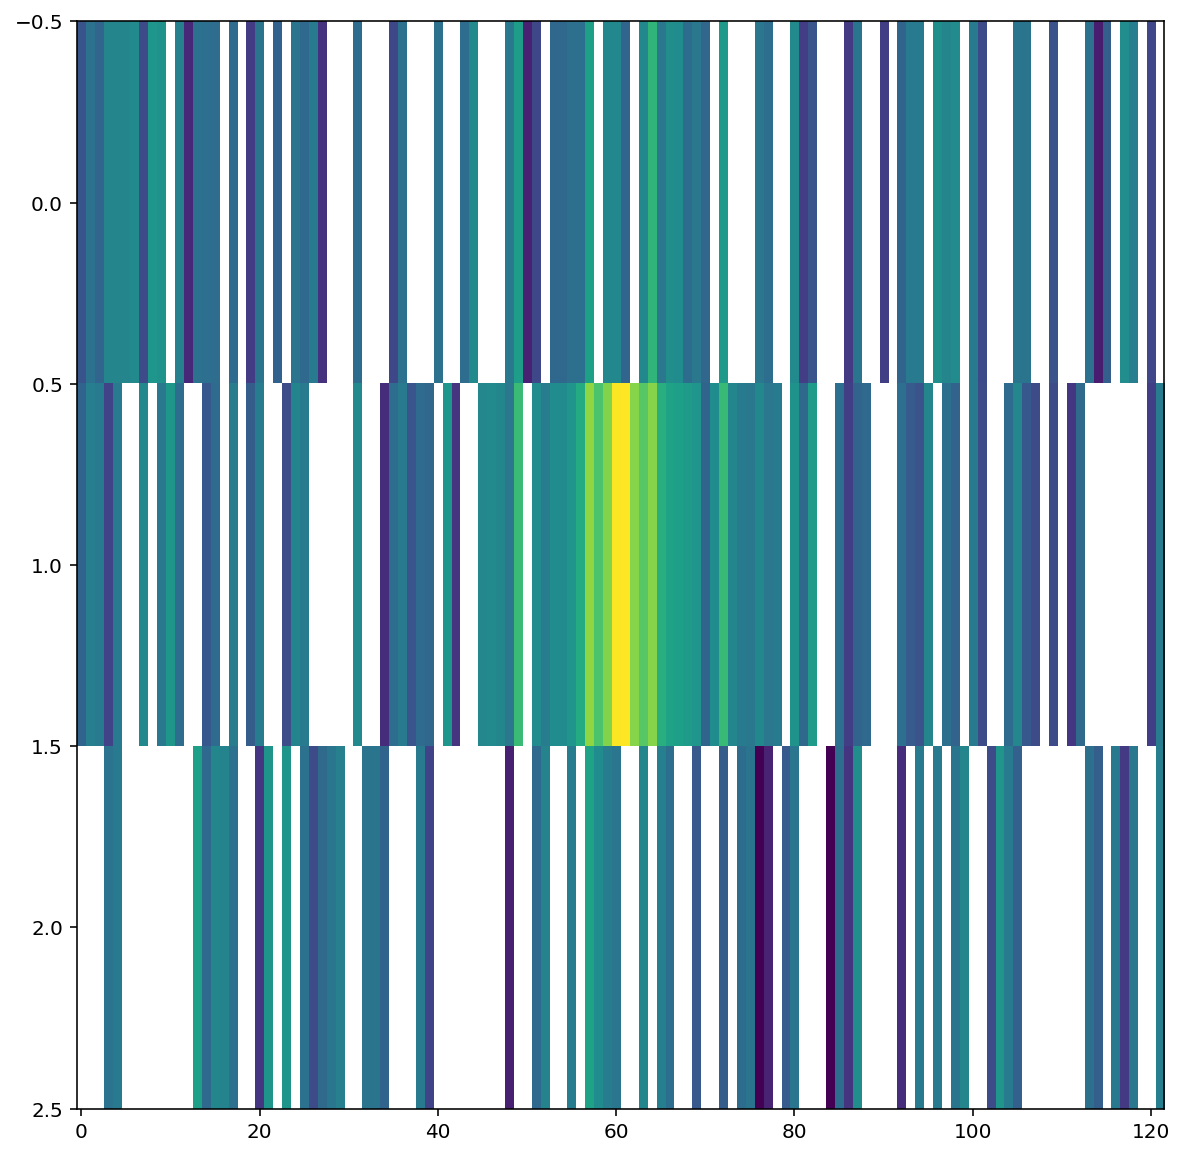

In [67]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10,10))
plt.imshow(im,aspect=im.shape[1]/im.shape[0],norm=LogNorm(None, None))

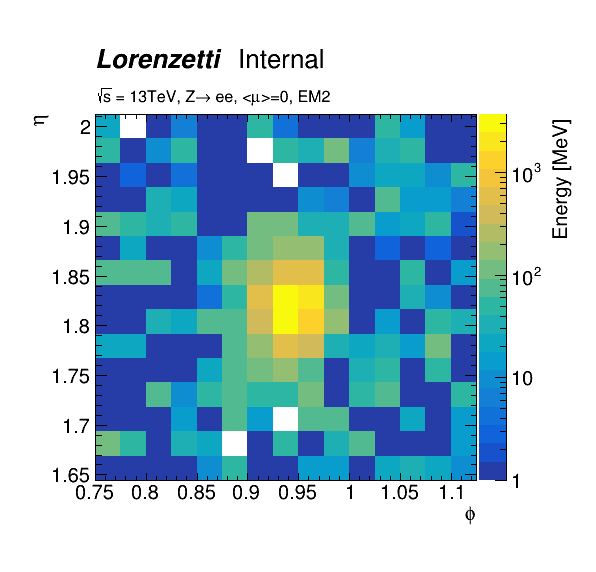

In [27]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
sampling = 'EMB2'
sampling_idx = 3
evt = 56

eta, phi, cells = get_cells(path, evt, [sampling_idx])
eta_bins = get_bins_inside_window( atlas_cells[sampling][0]['EtaBins'], eta )
phi_bins = get_bins_inside_window( atlas_cells[sampling][0]['PhiBins'], phi )
h1 = rpl.hist2d.new2( 'hist', eta_bins, phi_bins )
for cell in cells:
    binx = h1.GetXaxis().FindBin(cell.eta)
    biny = h1.GetYaxis().FindBin(cell.phi)    
    h1.SetBinContent( binx, biny, cell.e )
rpl.clear()
fig = rpl.create_canvas('my_canvas','',600, 600)
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
canvas.SetLogz()
gStyle.SetPalette(kBird)
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, Z#rightarrow ee, <#mu>=0, EM2', textsize=0.03)
rpl.set_xlabel('#phi')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Energy [MeV]")
rpl.format_canvas_axes(YTitleOffset=1.5, ZTitleOffset=1.5) 
fig.show()
fig.savefig('output/lorenzetti_simulation_zee_cells_emb2.pdf')

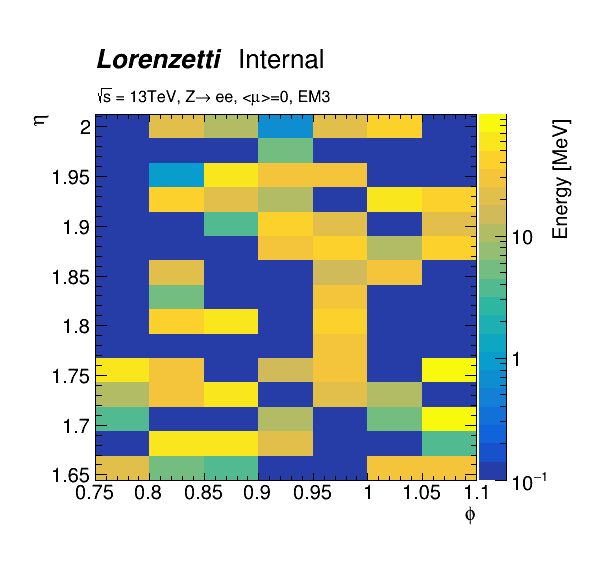

In [29]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
sampling = 'EMB3'
sampling_idx = 4
evt = 56

eta, phi, cells = get_cells(path, evt, [sampling_idx])
eta_bins = get_bins_inside_window( atlas_cells[sampling][0]['EtaBins'], eta )
phi_bins = get_bins_inside_window( atlas_cells[sampling][0]['PhiBins'], phi )
h1 = rpl.hist2d.new2( 'hist', eta_bins, phi_bins )
for cell in cells:
    binx = h1.GetXaxis().FindBin(cell.eta)
    biny = h1.GetYaxis().FindBin(cell.phi)    
    h1.SetBinContent( binx, biny, cell.e )
rpl.clear()
fig = rpl.create_canvas('my_canvas','',600, 600)
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
canvas.SetLogz()
gStyle.SetPalette(kBird)
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, Z#rightarrow ee, <#mu>=0, EM3', textsize=0.03)
rpl.set_xlabel('#phi')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Energy [MeV]")
rpl.format_canvas_axes(YTitleOffset=1.5, ZTitleOffset=1.5) 
fig.show()
fig.savefig('output/lorenzetti_simulation_zee_cells_emb3.pdf')

In [12]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
print(path)
sampling = 'EMB2'
sampling_idx = 3
evt = 56

cells = get_cells(path, evt, [sampling_idx])
eta_bins = atlas_cells[sampling][0]['EtaBins']
phi_bins = atlas_cells[sampling][0]['PhiBins']
h1 = rpl.hist2d.new2( 'hist', eta_bins, phi_bins )
for cell in cells:
    binx = h1.GetXaxis().FindBin(cell.eta)
    biny = h1.GetYaxis().FindBin(cell.phi)    
    h1.SetBinContent( binx, biny, cell.e )
rpl.clear()
fig = rpl.create_canvas('my_canvas','',600, 600)
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
#canvas.SetLogz()
gStyle.SetPalette(kBird)
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, Z#rightarrow ee, <#mu>=0, EM3', textsize=0.03)
rpl.set_xlabel('#phi')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Energy [MeV]")
rpl.format_canvas_axes(YTitleOffset=1.5, ZTitleOffset=1.5) 
fig.show()
fig.savefig('output/lorenzetti_simulation_zee_cells_emb3.pdf')

/home/jodafons/public/cern_data/simulation/v1.0.1/Zee/AOD/Zee.AOD.root


TypeError: unhashable type: 'list'